# Project Overview:
(Kaggle - credits to MEHMET URUC)

## Business Problem

### Context


Telco customer churn data includes information about a home phone and Internet service provider telecom company in California. It includes which customers have left, stayed or signed up for the service.



### Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.




### About Data


customerID: Customer ID
Demograhic Information

gender: Whether the customer is a male or a female
SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
Partner: Whether the customer has a partner or not (Yes, No)
Dependents: Whether the customer has dependents or not (Yes, No)
Service Information

PhoneService: Whether the customer has a phone service or not (Yes, No)
MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
Customer account information

Contract: The contract term of the customer (Month-to-month, One year, Two year)
PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
MonthlyCharges: The amount charged to the customer monthly
TotalCharges: The total amount charged to the customer
tenure: Number of months the customer has stayed with the company
Churn

Churn: Whether the customer churned or not (Yes or No)





In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action="ignore")


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [11]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


## Exploratory Data Analysis

In [12]:
def check_df(dataframe, head=5):
    print("############################################################## Shape ###############################################################")
    print(dataframe.shape)
    print("############################################################### Types ###############################################################")
    print(dataframe.dtypes)
    print("############################################################### Head ###############################################################")
    print(dataframe.head(head))
    print("############################################################### Tail ###############################################################")
    print(dataframe.tail(head))
    print("############################################################### NA ##############################################################")
    print(dataframe.isnull().sum())
    print("############################################################### Quantiles ###############################################################")
    print(dataframe.quantile([0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]).T)
    print("############################################################### NUMBERUNIQE ###############################################################")
    print(dataframe.nunique())

In [13]:
check_df(df)


############################################################## Shape ###############################################################
(7043, 21)
############################################################### Types ###############################################################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
############################################################### Head ###################################################

In [14]:
# Change total charges type object to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')


In [15]:
# We need 1 and 0 instead of yes and no
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

In [16]:
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [18]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [19]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 7032
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 2


#### Categoric Variables Analysis

In [20]:
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

        gender  Ratio
Male      3549 50.469
Female    3483 49.531
##########################################


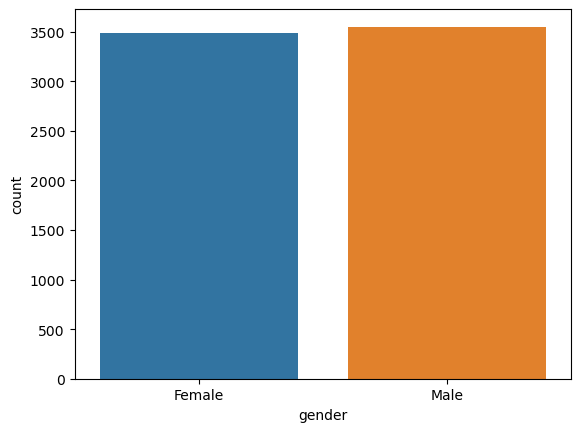

     Partner  Ratio
No      3639 51.749
Yes     3393 48.251
##########################################


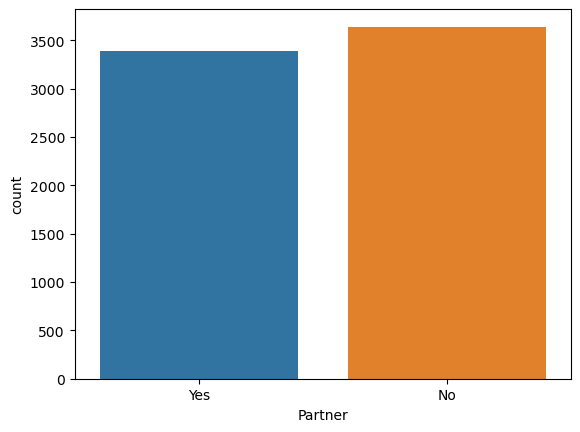

     Dependents  Ratio
No         4933 70.151
Yes        2099 29.849
##########################################


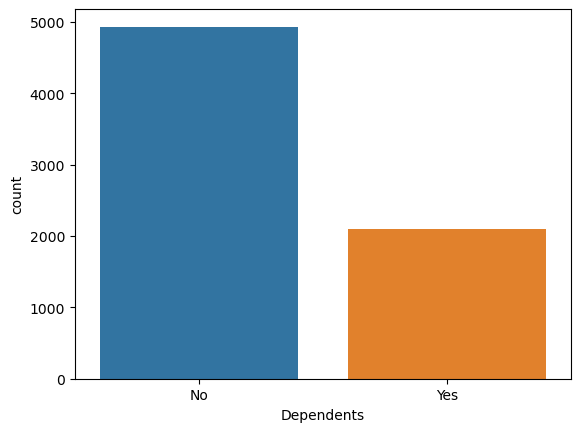

     PhoneService  Ratio
Yes          6352 90.330
No            680  9.670
##########################################


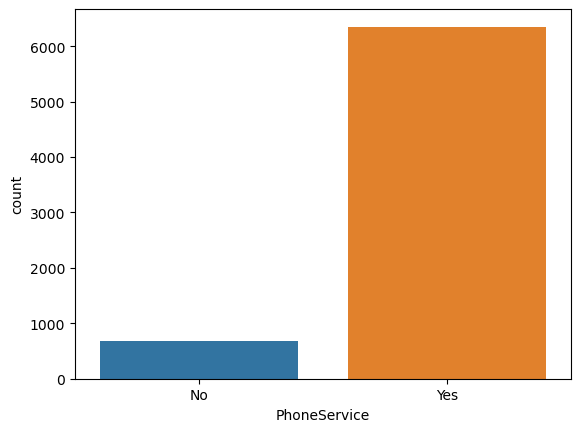

                  MultipleLines  Ratio
No                         3385 48.137
Yes                        2967 42.193
No phone service            680  9.670
##########################################


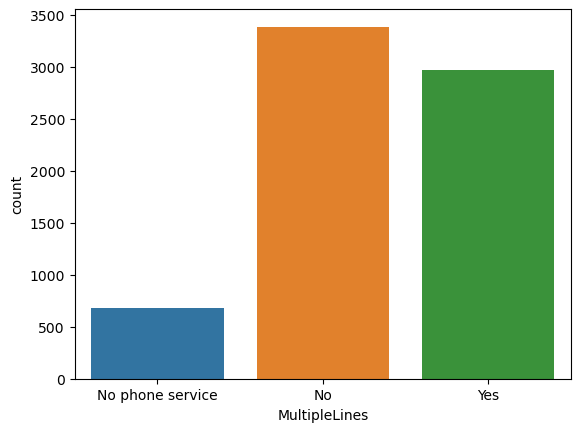

             InternetService  Ratio
Fiber optic             3096 44.027
DSL                     2416 34.357
No                      1520 21.615
##########################################


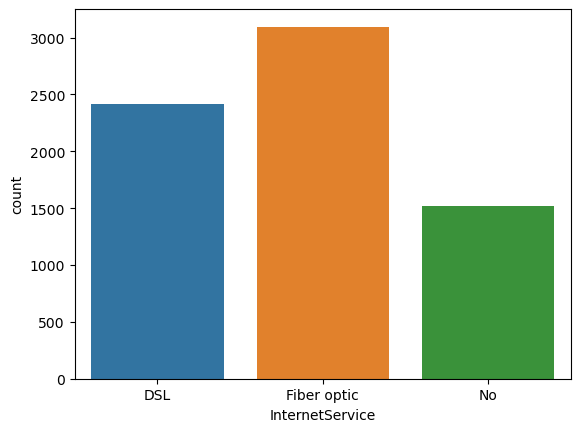

                     OnlineSecurity  Ratio
No                             3497 49.730
Yes                            2015 28.655
No internet service            1520 21.615
##########################################


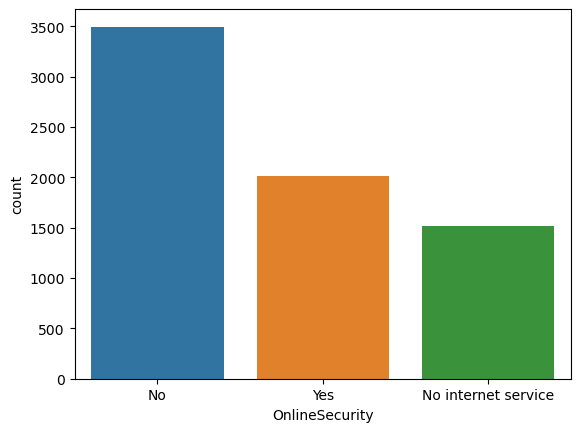

                     OnlineBackup  Ratio
No                           3087 43.899
Yes                          2425 34.485
No internet service          1520 21.615
##########################################


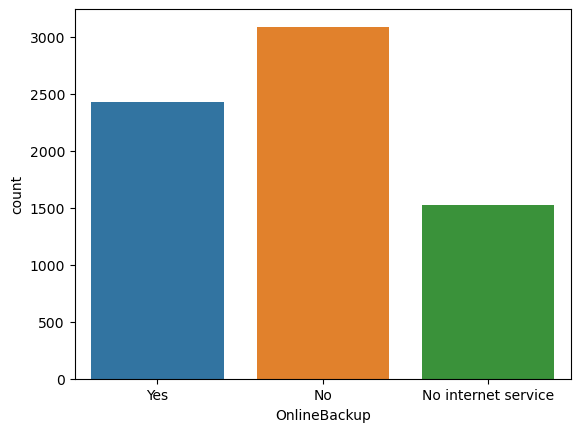

                     DeviceProtection  Ratio
No                               3094 43.999
Yes                              2418 34.386
No internet service              1520 21.615
##########################################


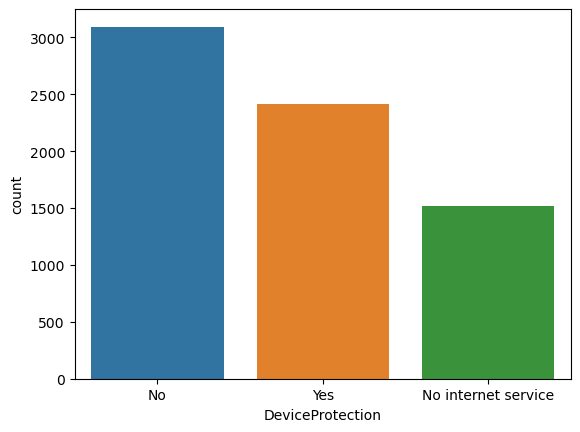

                     TechSupport  Ratio
No                          3472 49.374
Yes                         2040 29.010
No internet service         1520 21.615
##########################################


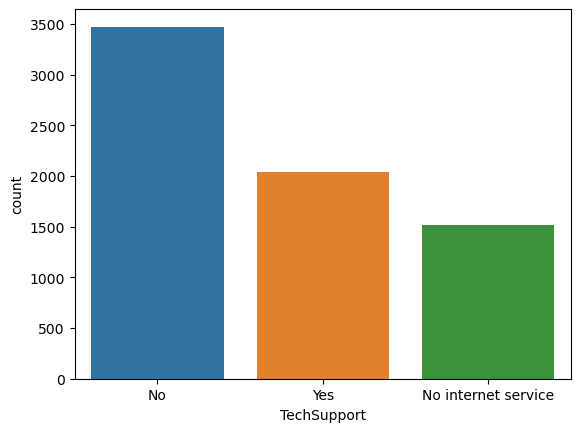

                     StreamingTV  Ratio
No                          2809 39.946
Yes                         2703 38.439
No internet service         1520 21.615
##########################################


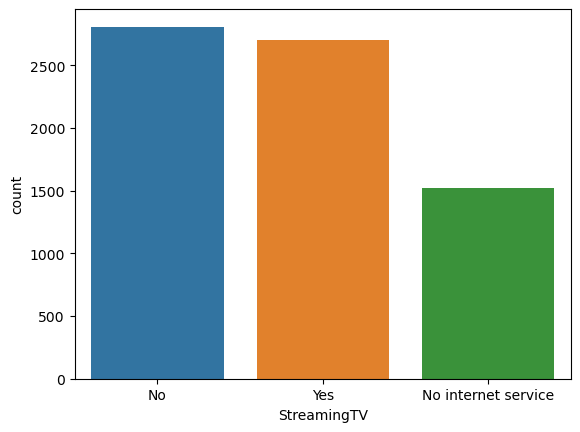

                     StreamingMovies  Ratio
No                              2781 39.548
Yes                             2731 38.837
No internet service             1520 21.615
##########################################


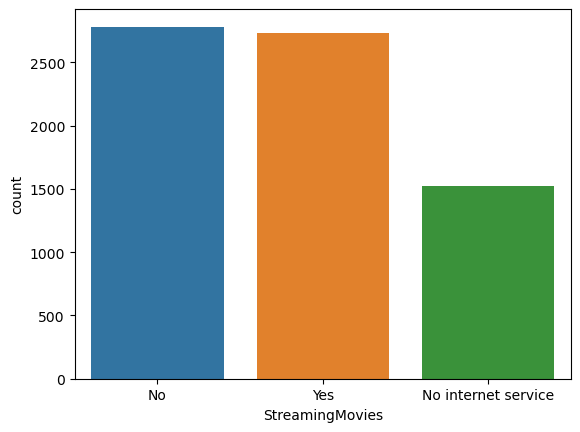

                Contract  Ratio
Month-to-month      3875 55.105
Two year            1685 23.962
One year            1472 20.933
##########################################


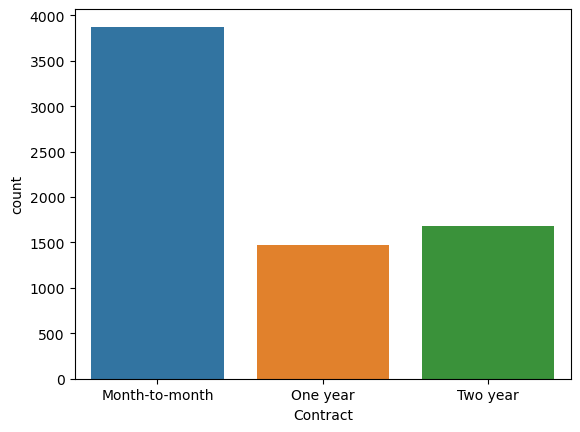

     PaperlessBilling  Ratio
Yes              4168 59.272
No               2864 40.728
##########################################


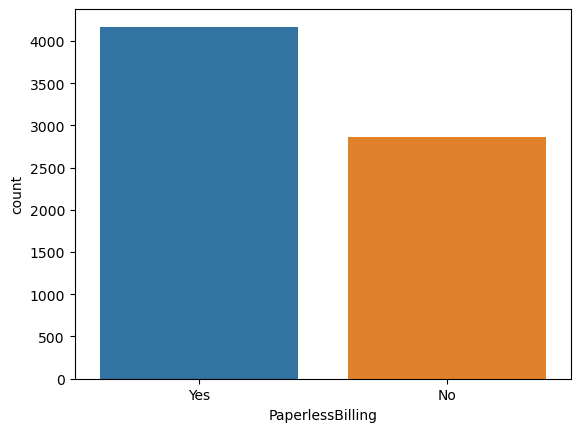

                           PaymentMethod  Ratio
Electronic check                    2365 33.632
Mailed check                        1604 22.810
Bank transfer (automatic)           1542 21.928
Credit card (automatic)             1521 21.630
##########################################


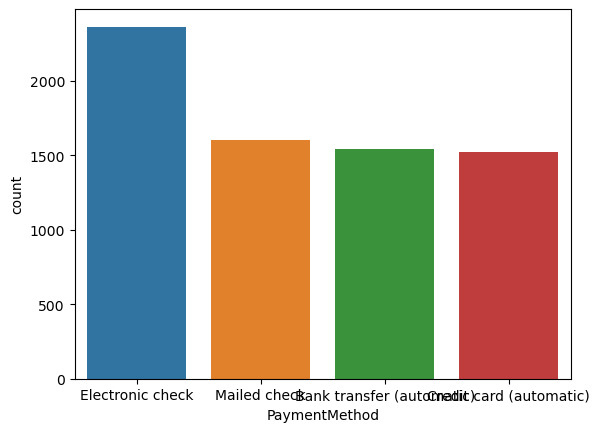

   SeniorCitizen  Ratio
0           5890 83.760
1           1142 16.240
##########################################


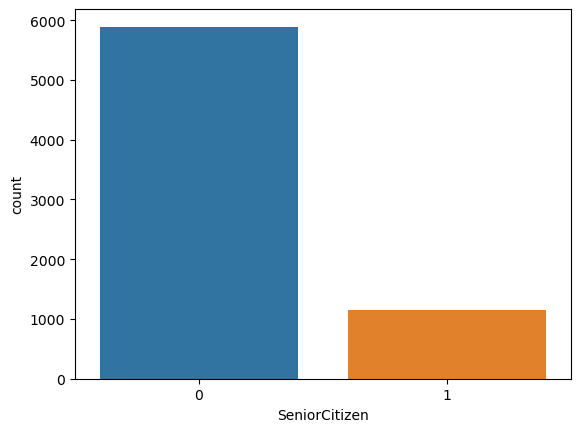

   Churn  Ratio
0   5163 73.422
1   1869 26.578
##########################################


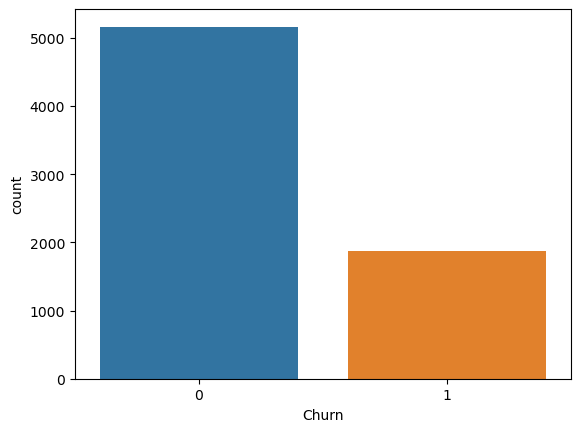

In [21]:
for col in cat_cols:
    cat_summary(df,col,plot=True)

#### Numeric Variables Analysis

In [22]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

count   7032.000
mean      32.422
std       24.545
min        1.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.800
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


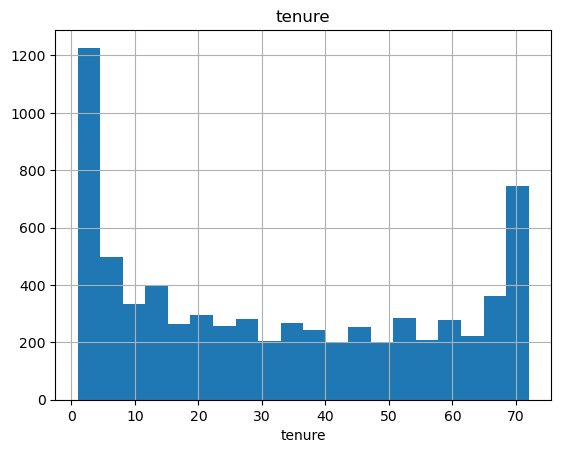

count   7032.000
mean      64.798
std       30.086
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.900
40%       58.920
50%       70.350
60%       79.150
70%       85.535
80%       94.300
90%      102.645
95%      107.422
99%      114.734
max      118.750
Name: MonthlyCharges, dtype: float64


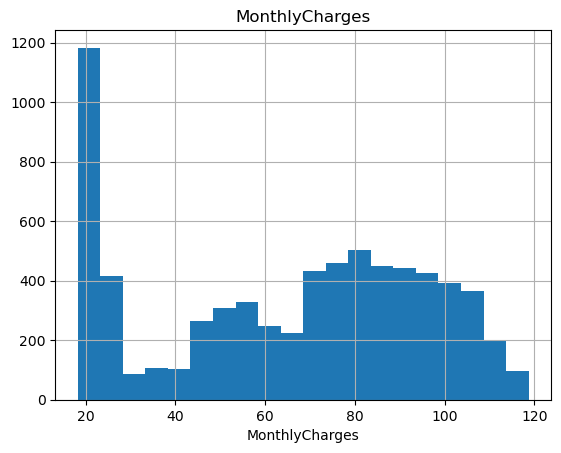

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


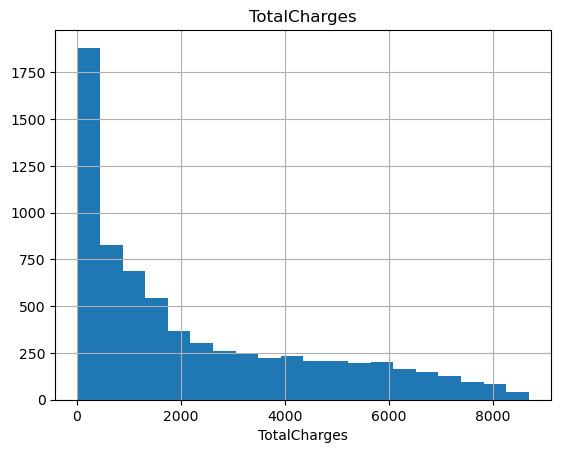

In [23]:
for col in num_cols:
    num_summary(df, col, plot=True)

#### ANALYSIS OF NUMERICAL VARIABLES ACCORDING TO TARGET



In [24]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [25]:
for col in num_cols:
    target_summary_with_num(df, "Churn", col)

       tenure
Churn        
0      37.650
1      17.979


       MonthlyCharges
Churn                
0              61.307
1              74.441


       TotalCharges
Churn              
0          2555.344
1          1531.796




In [27]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")

In [28]:
for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)

gender
        TARGET_MEAN  Count  Ratio
Female        0.270   3483 49.531
Male          0.262   3549 50.469


Partner
     TARGET_MEAN  Count  Ratio
No         0.330   3639 51.749
Yes        0.197   3393 48.251


Dependents
     TARGET_MEAN  Count  Ratio
No         0.313   4933 70.151
Yes        0.155   2099 29.849


PhoneService
     TARGET_MEAN  Count  Ratio
No         0.250    680  9.670
Yes        0.267   6352 90.330


MultipleLines
                  TARGET_MEAN  Count  Ratio
No                      0.251   3385 48.137
No phone service        0.250    680  9.670
Yes                     0.286   2967 42.193


InternetService
             TARGET_MEAN  Count  Ratio
DSL                0.190   2416 34.357
Fiber optic        0.419   3096 44.027
No                 0.074   1520 21.615


OnlineSecurity
                     TARGET_MEAN  Count  Ratio
No                         0.418   3497 49.730
No internet service        0.074   1520 21.615
Yes                        0.146   2015 28.655


O

In [29]:
df[num_cols].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000,0.247,0.826
MonthlyCharges,0.247,1.000,0.651
TotalCharges,0.826,0.651,1.000


In [30]:
df.corrwith(df["Churn"]).sort_values(ascending=False)

Churn             1.000
MonthlyCharges    0.193
SeniorCitizen     0.151
TotalCharges     -0.199
tenure           -0.354
dtype: float64

In [31]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(12, 10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

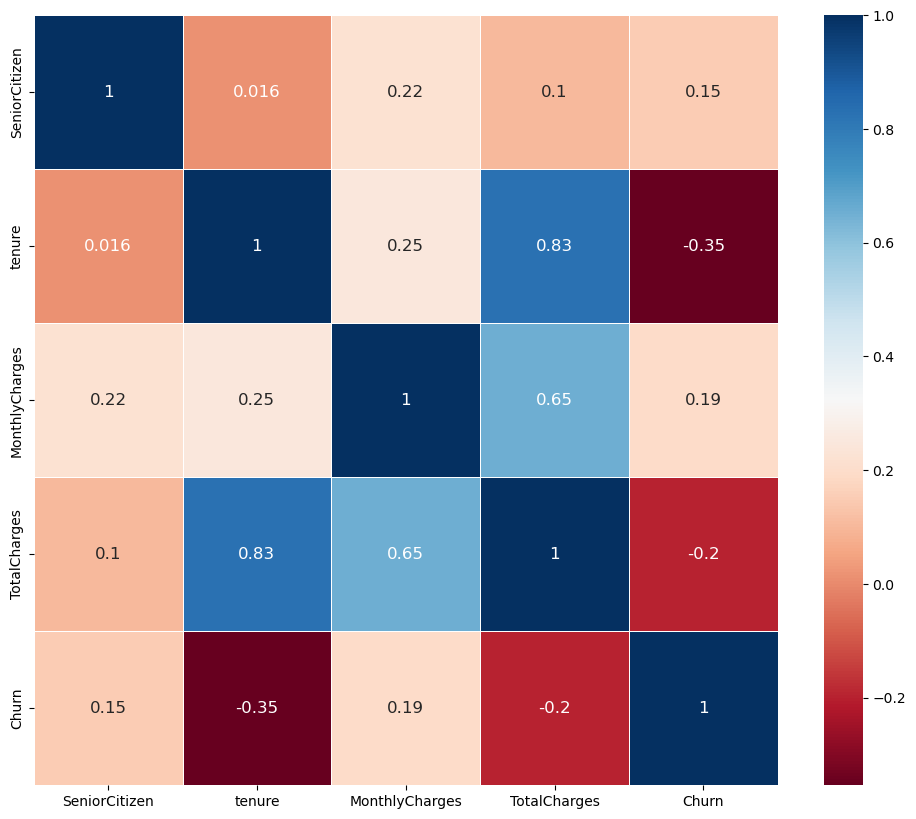

In [32]:
correlation_matrix(df, df.columns)

## Data Preprocessing & Feature Engineering


In [33]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [34]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [35]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [36]:
for col in num_cols:
    print(col, check_outlier(df, col))
   

tenure False
MonthlyCharges False
TotalCharges False


#### BASE MODEL



In [37]:
cat_cols = [col for col in cat_cols if col not in ["Churn"]]


In [38]:
df_base = df.copy()


In [39]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [40]:
df_base = one_hot_encoder(df_base, cat_cols, drop_first=True)

In [41]:
y = df_base["Churn"]
X = df_base.drop(["Churn","customerID"], axis=1)

models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345))]

In [42]:
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

########## LR ##########
Accuracy: 0.8015
Auc: 0.8427
Recall: 0.5356
Precision: 0.6553
F1: 0.5889
########## KNN ##########
Accuracy: 0.7635
Auc: 0.7463
Recall: 0.4462
Precision: 0.5715
F1: 0.5006
########## CART ##########
Accuracy: 0.7282
Auc: 0.6603
Recall: 0.5115
Precision: 0.4897
F1: 0.5
########## RF ##########
Accuracy: 0.7947
Auc: 0.826
Recall: 0.4885
Precision: 0.6533
F1: 0.5587
########## XGB ##########
Accuracy: 0.7868
Auc: 0.8245
Recall: 0.5083
Precision: 0.623
F1: 0.559
########## LightGBM ##########
Accuracy: 0.7961
Auc: 0.8369
Recall: 0.5168
Precision: 0.6471
F1: 0.5743
########## CatBoost ##########
Accuracy: 0.7996
Auc: 0.8404
Recall: 0.5152
Precision: 0.6579
F1: 0.5776


In [43]:
df.loc[(df["PaymentMethod"] == "Electronic check") | (df["PaymentMethod"] == "Mailed check"), "PaymentMethodUnified" ] = "Check"
df.loc[~(df["PaymentMethod"] == "Electronic check") | (df["PaymentMethod"] == "Mailed check"), "PaymentMethodUnified" ] = "Automatic"

df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)


#Customer account information

df.loc[(df["Contract"] == "Month-to-month"), "Subscrition"] = "NoSubs"
df.loc[((df["Contract"] == "One year") | (df["Contract"] == "Two year")), "Subscrition"] = "Subs"

df["NewTenure"] = pd.qcut(df["tenure"], 4, labels=["Level1", "Level2", "Level3", "Level4"])

df["NewMonthlyCharges:"] = pd.qcut(df["MonthlyCharges"], 4, labels=["Level1", "Level2", "Level3", "Level4"])

df["NewTotalCharges:"] = pd.qcut(df["TotalCharges"], 4, labels=["Level1", "Level2", "Level3", "Level4"])#Customer account information

df.loc[(df["Contract"] == "Month-to-month"), "Subscrition"] = "NoSubs"
df.loc[((df["Contract"] == "One year") | (df["Contract"] == "Two year")), "Subscrition"] = "Subs"

df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NewTenureYear"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NewTenureYear"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NewTenureYear"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NewTenureYear"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NewTenureYear"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NewTenureYear"] = "5-6 Year"

df["NewAutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)


In [44]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 7032
Variables: 29
cat_cols: 25
num_cols: 3
cat_but_car: 1
num_but_cat: 7


In [45]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


In [46]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]


for col in binary_cols:
    df = label_encoder(df, col)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   customerID            7032 non-null   object  
 1   gender                7032 non-null   int64   
 2   SeniorCitizen         7032 non-null   int64   
 3   Partner               7032 non-null   int64   
 4   Dependents            7032 non-null   int64   
 5   tenure                7032 non-null   int64   
 6   PhoneService          7032 non-null   int64   
 7   MultipleLines         7032 non-null   object  
 8   InternetService       7032 non-null   object  
 9   OnlineSecurity        7032 non-null   object  
 10  OnlineBackup          7032 non-null   object  
 11  DeviceProtection      7032 non-null   object  
 12  TechSupport           7032 non-null   object  
 13  StreamingTV           7032 non-null   object  
 14  StreamingMovies       7032 non-null   object  
 15  Cont

In [47]:
#cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn"]]
#cat_cols
cat_cols = [col for col in cat_cols if  col not in ["Churn"]]
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'PaymentMethodUnified',
 'Subscrition',
 'NewTenureYear',
 'SeniorCitizen',
 'NEW_TotalServices',
 'NewTenure',
 'NewMonthlyCharges:',
 'NewTotalCharges:',
 'NewAutoPayment']

In [48]:
df = one_hot_encoder(df, cat_cols, drop_first=True)
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_1,Partner_1,Dependents_1,PhoneService_1,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethodUnified_1,Subscrition_1,NewTenureYear_1-2 Year,NewTenureYear_2-3 Year,NewTenureYear_3-4 Year,NewTenureYear_4-5 Year,NewTenureYear_5-6 Year,SeniorCitizen_1,NEW_TotalServices_1,NEW_TotalServices_2,NEW_TotalServices_3,NEW_TotalServices_4,NEW_TotalServices_5,NEW_TotalServices_6,NEW_TotalServices_7,NewTenure_Level2,NewTenure_Level3,NewTenure_Level4,NewMonthlyCharges:_Level2,NewMonthlyCharges:_Level3,NewMonthlyCharges:_Level4,NewTotalCharges:_Level2,NewTotalCharges:_Level3,NewTotalCharges:_Level4,NewAutoPayment_1
0,7590-VHVEG,1,29.850,29.850,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,56.950,1889.500,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
2,3668-QPYBK,2,53.850,108.150,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,7795-CFOCW,45,42.300,1840.750,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1
4,9237-HQITU,2,70.700,151.650,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [49]:
# To prevent "Do not support special JSON characters in feature name." error
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

## Modelling

In [50]:
y = df["Churn"]
X = df.drop(["Churn","customerID"], axis=1)

In [51]:
models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345))]

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

########## LR ##########
Accuracy: 0.8039
Auc: 0.8444
Recall: 0.5372
Precision: 0.6616
F1: 0.5926
########## KNN ##########
Accuracy: 0.7619
Auc: 0.7456
Recall: 0.4409
Precision: 0.5682
F1: 0.4959
########## CART ##########
Accuracy: 0.7291
Auc: 0.6581
Recall: 0.5024
Precision: 0.4906
F1: 0.4963
########## RF ##########
Accuracy: 0.791
Auc: 0.8256
Recall: 0.4949
Precision: 0.6392
F1: 0.5576
########## XGB ##########
Accuracy: 0.7868
Auc: 0.8229
Recall: 0.5094
Precision: 0.6217
F1: 0.5597
########## LightGBM ##########
Accuracy: 0.7961
Auc: 0.8355
Recall: 0.5275
Precision: 0.6432
F1: 0.5789
########## CatBoost ##########
Accuracy: 0.7998
Auc: 0.8415
Recall: 0.5217
Precision: 0.6564
F1: 0.581


In [52]:
# Set hyperparametres with using Light GBM. Light GBM is fast and can give me better result
lgbm_model = LGBMClassifier(random_state=17)

lgbm_params = {"learning_rate": [0.01, 0.1, 0.001],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)
lgbm_best_grid.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 300}

In [53]:
lgbm_final = lgbm_model.set_params(colsample_bytree=0.5,learning_rate=0.01,n_estimators=300, random_state=17).fit(X, y)

cv_results = cross_validate(lgbm_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()
cv_results['test_f1'].mean()
cv_results['test_roc_auc'].mean()

0.8474286124399356

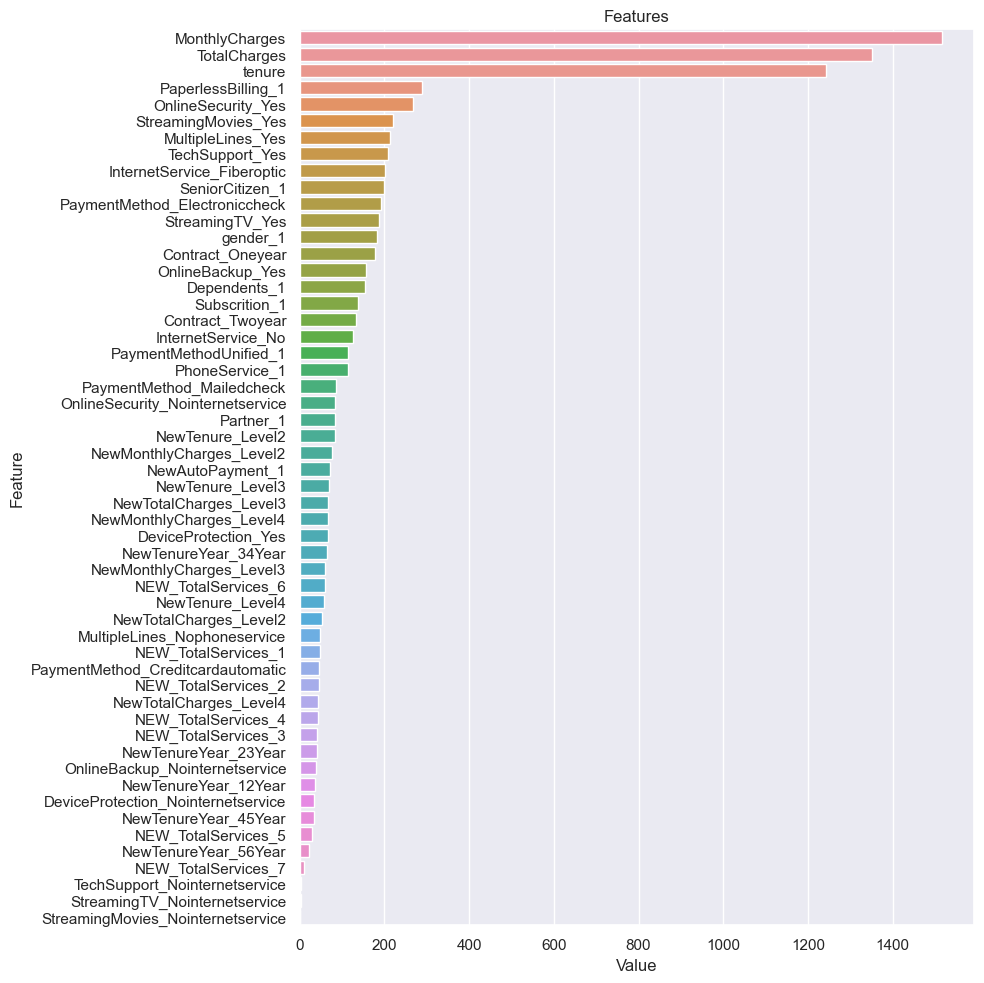

In [54]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(lgbm_final, X)